<a href="https://colab.research.google.com/github/hrbae/LG_AI_training/blob/main/M1_Proces_Innovationby_ML/Practice_1_1_Process_mining_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Process mining with Python


##1. Process mining Overview

*  정보시스템에 기록되어있는 이벤트 로그 데이터에서 지식을 추출함으로써 사람들이 머리 속에서 추정하고 잇는 프로세스가 아닌 실제 업무 프로세스를 도출하고, 모니터링하며, 개선하는 방법론
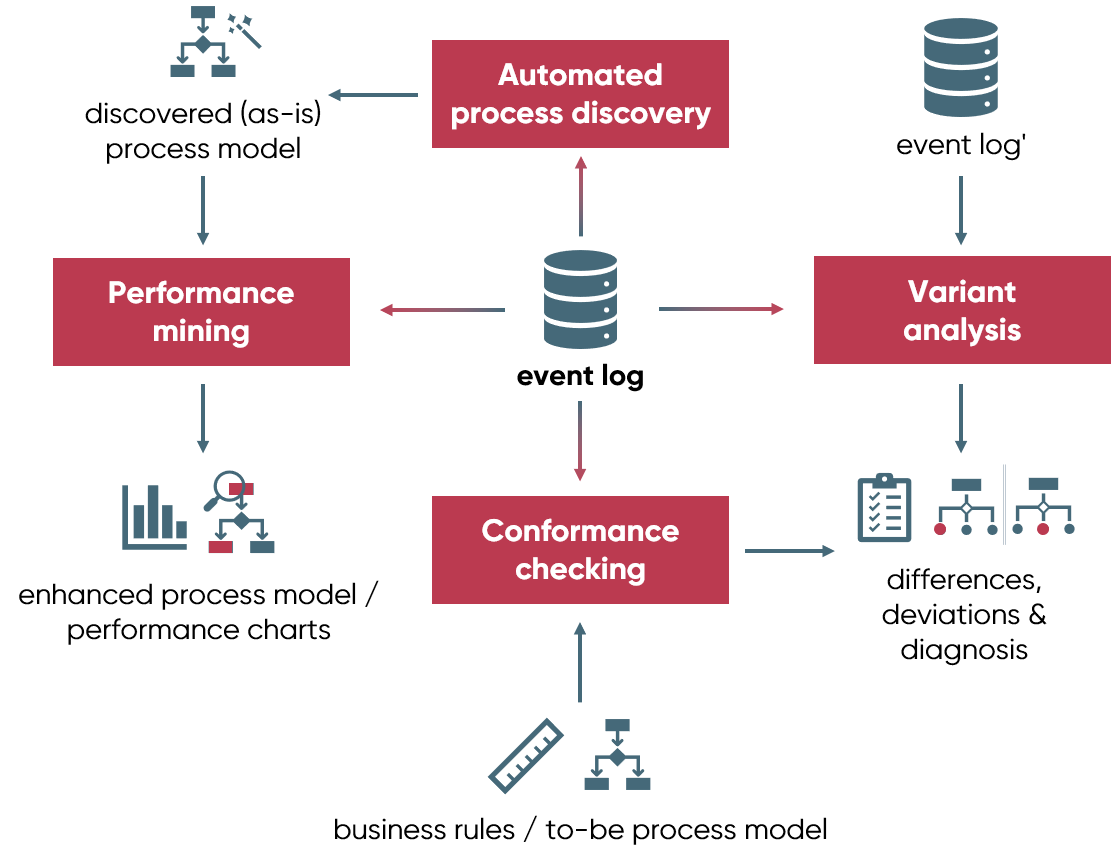












##2.Process Mining Tool



1. Disco (https://fluxicon.com/disco/)
- 네덜란드 'Fluxicon'이라는 업체가 만든 프로세스 마이닝 솔루션
- 전세계에서 가장 많이 사용되는 프로세스 마이닝 솔루션 중 하나
- 장점: 사용이 가장 쉽고, 편하다. 코딩을 직접하지 않고 버튼으로 기본적인 분석이 가능하다. 간편한 UI를 제공한다.
- 단점: 단순한 Process model을 발견할 수 잇지만, 정밀한 분석 작업을 진행하는 게 쉽지 않고, 세부적인 파라미터 및 값 설정이 제한된다. 
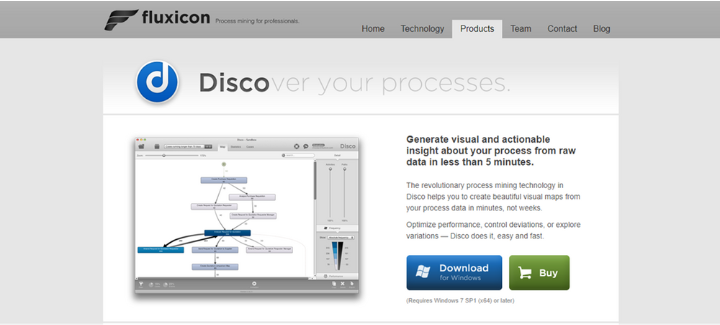


2. pm4py (https://pm4py.fit.fraunhofer.de/)


*   독일 'Fraunhofer FIT'에서 개발하였으며, 지속적으로 업데이트를 제공해주는 프로세스 마이닝 솔루션
*   Python으로 개발되어 있으며, 자유롭게 설치하여 사용가능
*   장점: Python 사용자들이 사용이 편하고 다른 프레임워크들과 협업이 쉽다.
*   단점: 시각화의 확장성이 부족하고, 데이터의 용량이 커질수록 분석시간이 비약적으로 증가한다.






3. ProM (https://promtools.org/)
*   독일 아헨공대 Aalst교수 연구팀이 만든 프로세스 마이닝 소프트웨어
*   Java로 개발되어있으며, 새로운 기능이 Plug-in 형태로 개발되어 추가되고 있음
*   장점: 특별한 목적을 가진 분석(ad-hoc)에 특화된 프로그램이며 거의 모든 현존 프로세스 마이닝 관련 패키지(plug-in)을 지원한다. 프로그램이 도메인이나 조직의 특성에 맞게 커스터마이징 가능하다. 
*   단점: ProM 은 높은 프로세스 마이닝 지식을 요구한다. Discover Concurrency의 불가능함과 한정된 적합도 검사 방법을 가지고 있다. ProM은 정확하게 일치하는 모델이나 적합도 검사보다는 Performance Analysis에 더욱 초점을 둔다.

In [35]:
# pm4py 설치
!pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
# 필요 라이브러리 호출
import pm4py
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
import pandas as pd

In [37]:
#Colab drive 모듈 이용하여 연동
from google.colab import drive
drive.mount('/content/gdriv')

Drive already mounted at /content/gdriv; to attempt to forcibly remount, call drive.mount("/content/gdriv", force_remount=True).


#데이터 설명
*   출처: BPI Challenge 2016 (https://data.4tu.nl/collections/ea85f19e-26a9-497a-9ac8-06afb069d6a7)
*   네덜란드에서 고용 보험관련하여 웹사이트에서 기록된 로그인 가능한 회원들의 "사이트 내 이동 경로", "컴플레인 사항"에 관한 이벤트 로그

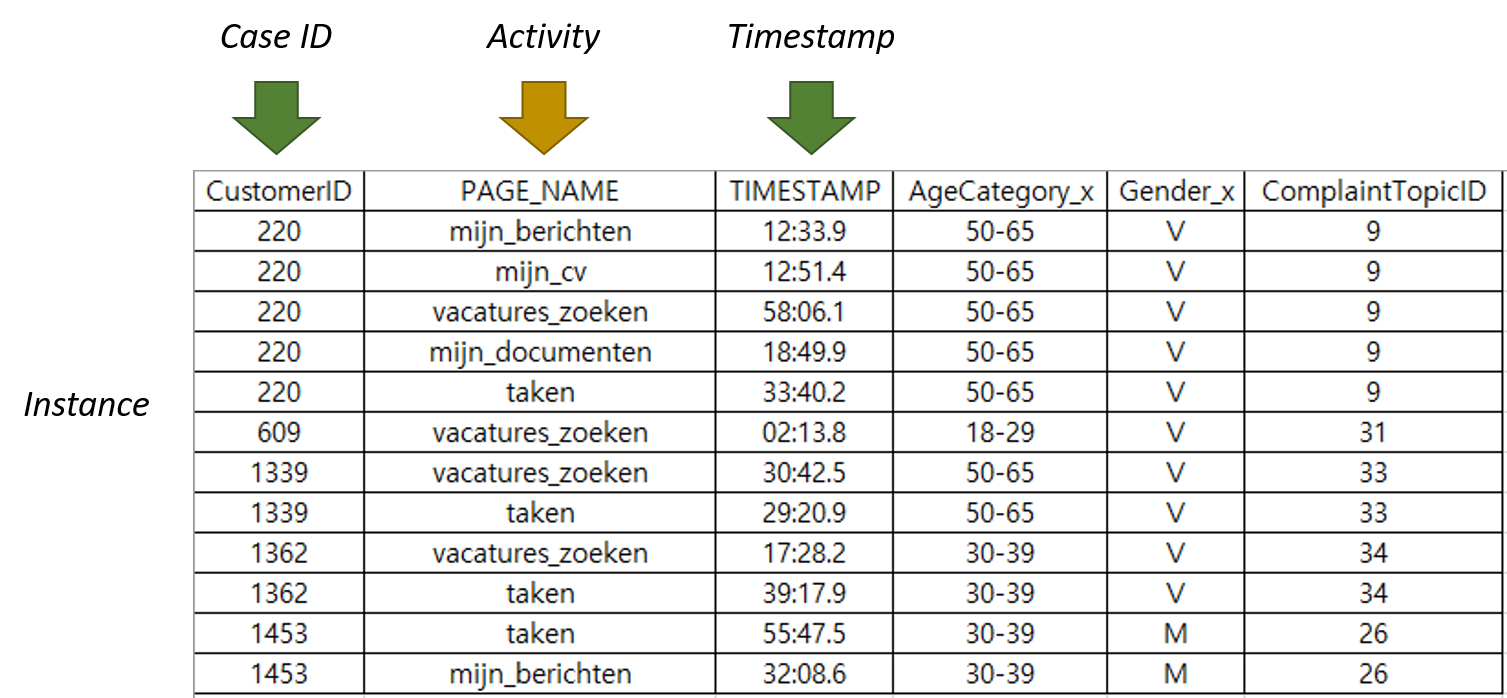


In [38]:
# 실습용 데이터 호출
init_log = pd.read_csv('https://raw.githubusercontent.com/hrbae/LG_AI_training/main/M1_Proces_Innovationby_ML/eventlog%20(2).csv')
print(init_log.columns)
init_log

Index(['CustomerID', 'PAGE_NAME', 'TIMESTAMP', 'AgeCategory_x', 'Gender_x',
       'ComplaintTopicID'],
      dtype='object')


,CustomerID,PAGE_NAME,TIMESTAMP,AgeCategory_x,Gender_x,ComplaintTopicID
0,2025826,50plus,2015-10-05 10:12:56.880,50-65,M,59.0
1,1503890,aanvragen-tw,2015-09-01 19:35:06.707,50-65,V,20.0
2,2063574,50plus,2015-11-06 10:47:42.137,40-49,M,33.0
3,2185161,bijstandsuitkering,2016-01-11 18:44:07.877,18-29,V,32.0
4,2074173,frankrijk,2015-11-09 22:43:19.973,50-65,V,19.0
...,...,...,...,...,...,...
55213,2196444,taken,2016-01-21 19:45:08.400,50-65,M,31.0
55214,2043571,wdo,2015-07-28 11:45:54.743,40-49,M,26.0
55215,990071,wdo,2016-01-20 12:05:50.680,30-39,V,29.0
55216,2074505,wdo,2015-09-04 11:42:24.867,18-29,V,26.0


In [39]:
init_log.dtypes

CustomerID            int64
PAGE_NAME            object
TIMESTAMP            object
AgeCategory_x        object
Gender_x             object
ComplaintTopicID    float64
dtype: object


*   CustomerID와 TIMESTAMP의 datatype을 변경
---
*   CustomerID: int64 -> object
*   TIMESTAMP: object -> datetime64


In [40]:
init_log['CustomerID']=init_log['CustomerID'].astype(str)
#실습1>TIMESTAMP DATETIME형식으로 변환

init_log.dtypes

CustomerID                  object
PAGE_NAME                   object
TIMESTAMP           datetime64[ns]
AgeCategory_x               object
Gender_x                    object
ComplaintTopicID           float64
dtype: object

#데이터 필터링



In [41]:
#Activity 목록 도출
from pm4py.algo.filtering.pandas.attributes import attributes_filter
activities=attributes_filter.get_attribute_values(init_log, attribute_key='PAGE_NAME')
print(activities)

{'taken': 11114, 'vacatures_zoeken': 10246, 'mijn_werkmap': 6643, 'mijn_berichten': 4926, 'wdo': 4114, 'mijn_cv': 3724, 'mijn_sollicitaties': 3151, 'mijn_online_trainingen': 2171, 'foutopgetreden.html': 1435, 'home': 1286, 'timeout.htm': 1054, 'mijn_bewijs_van_inschrijving': 872, 'wijziging_doorgeven': 842, 'mijn_documenten': 798, 'Portal (ignore_request_page)': 685, 'sollicitatie-wijziging': 542, 'mijn_tips': 355, 'mijn_rechten_en_plichten': 222, 'inschrijven': 161, 'mijn_agenda': 155, 'mijn_netwerk': 114, 'wdo211832': 101, 'werk-zoeken': 81, 'handleiding': 79, 'evenement': 66, 'PORTAL.wwsec_app_priv.logout': 60, 'onderhoud.htm': 32, 'cv-plaatsen': 29, 'tip-van-de-week': 25, 'mijn_taken': 16, 'ontslag': 16, 'over-werk-nl': 15, 'wederzijds-goedvinden': 14, 'gegevens': 7, 'werkmap': 6, '50plus': 6, 'bijstandsuitkering': 6, 'ignore_request_page': 5, 'PORTAL.wwpob_smd.login2': 5, 'nieuwsbericht': 5, 'uwv': 5, 'wdo214236': 4, 'rechtbijstand': 4, 'transitievergoeding': 3, 'regelen': 3, 'aan

In [42]:
#Inductive miner를 활용하여 petrinet을 도출(original data를 가지고 key값을 지정해주면서 도출)
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(init_log, activity_key='PAGE_NAME',timestamp_key='TIMESTAMP', case_id_key='CustomerID')
pm4py.view_petri_net(net, initial_marking, final_marking)


*   Filtering Variant
---


*   각 CaseID가 거쳐간 Activity들의 집합을 'Trace'라고 정의
*   수많은 Case가 포함되어 있는 Eventlog에서 동일한 Trace를 따르는 Case들이 따라가는 해당 Trace를 'Variant'라고 정의
*   Variant 종류가 줄어듬에 따라 Process Map 또한 축소되는 것을 확인할 수 있음





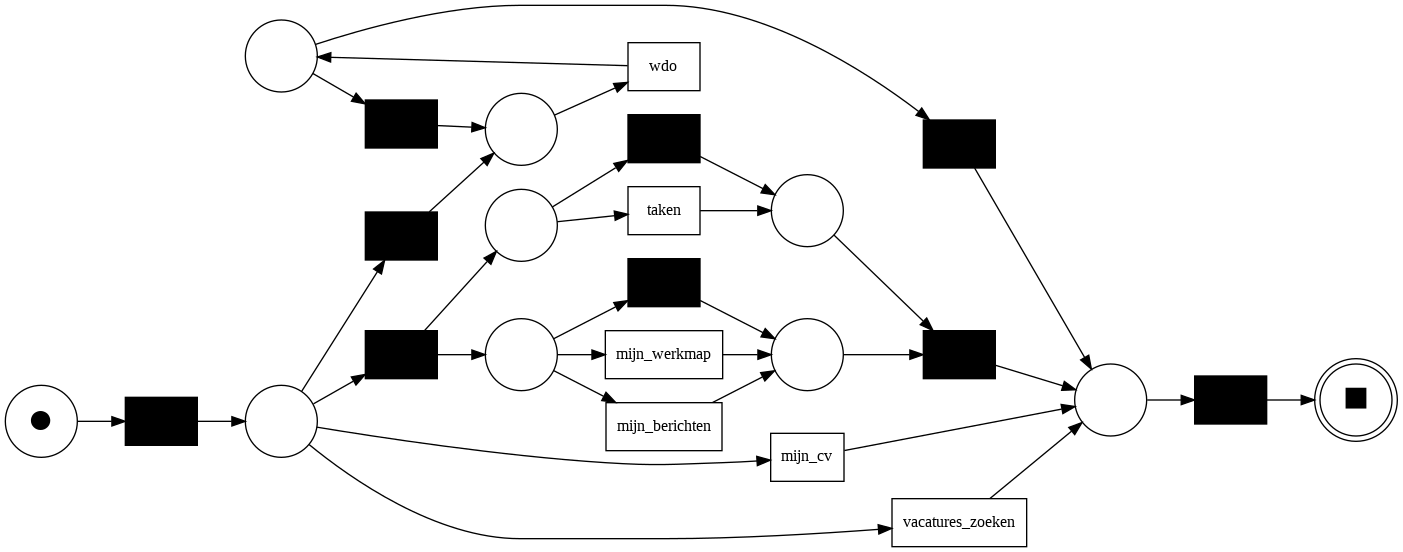

In [43]:
# Top k개 Variant를 필터링 (= 가장 많은 Case들이 따라간 Trace)

# top 45개의 Variant로 필터링
top45 = pm4py.filter_variants_top_k(init_log, k = 45, activity_key='PAGE_NAME',timestamp_key='TIMESTAMP', case_id_key='CustomerID')
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(top45, activity_key='PAGE_NAME',timestamp_key='TIMESTAMP', case_id_key='CustomerID')
pm4py.view_petri_net(net, initial_marking, final_marking)


# 실습2>top 25개의 Variant로 필터링




*   pm4py 를 이용해 프로세스 마이닝을 수행하기 위한 column명 설정

---


*   Case ID: 'case:concept:name'
*   Activity name : 'concept:name'
*   Timestamp : 'time:timestamp'





In [ ]:
eventlog=init_log.copy()
eventlog.rename(columns={'TIMESTAMP':'time:timestamp',
                          'CustomerID':'case:concept:name',
                          'PAGE_NAME':'concept:name'}, inplace=True)
log=log_converter.apply(eventlog)
print(log)



*   Filtering Activity
---



In [ ]:
#Start & End Activities 도출
from pm4py.algo.filtering.log.end_activities import end_activities_filter
from pm4py.algo.filtering.log.start_activities import start_activities_filter
start_activities = start_activities_filter.get_start_activities(log)
end_activities = end_activities_filter.get_end_activities(log)
print(start_activities)

In [ ]:
#Start activity와 End activity의 분포 barchart
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=1, ncols=2)
ax=ax.ravel()
ax[0].bar(x=list(start_activities.keys()),height=list(start_activities.values()))
ax[0].set_title("Start activity Distribution",fontsize=10)
ax[1].bar(x=list(end_activities.keys()),height=list(end_activities.values()))
ax[1].set_title("End activity Distribution",fontsize=10)

In [45]:
# 첫 activity가 'wdo'인 케이스 갯수
wdo_event=pm4py.filter_start_activities(log, activities=['wdo'])
start_activities = start_activities_filter.get_start_activities(wdo_event)
print(start_activities)

{'wdo': 359}


In [46]:
# 실습3> 첫 activity가 'taken'인 케이스 갯수


In [ ]:
# 마지막 activity가 'ignore_request_page'인 케이스
pm4py.filter_end_activities(log, activities=['ignore_request_page'])

*   Filtering Timestamp
----


In [ ]:
# 특정 시점에 모든 이벤트가 포함되는 이벤트 데이터만 필터링
from pm4py.algo.filtering.log.timestamp import timestamp_filter
filtered_log = timestamp_filter.filter_traces_contained(log, "2016-01-01 00:00:00", "2016-06-30 00:00:00")

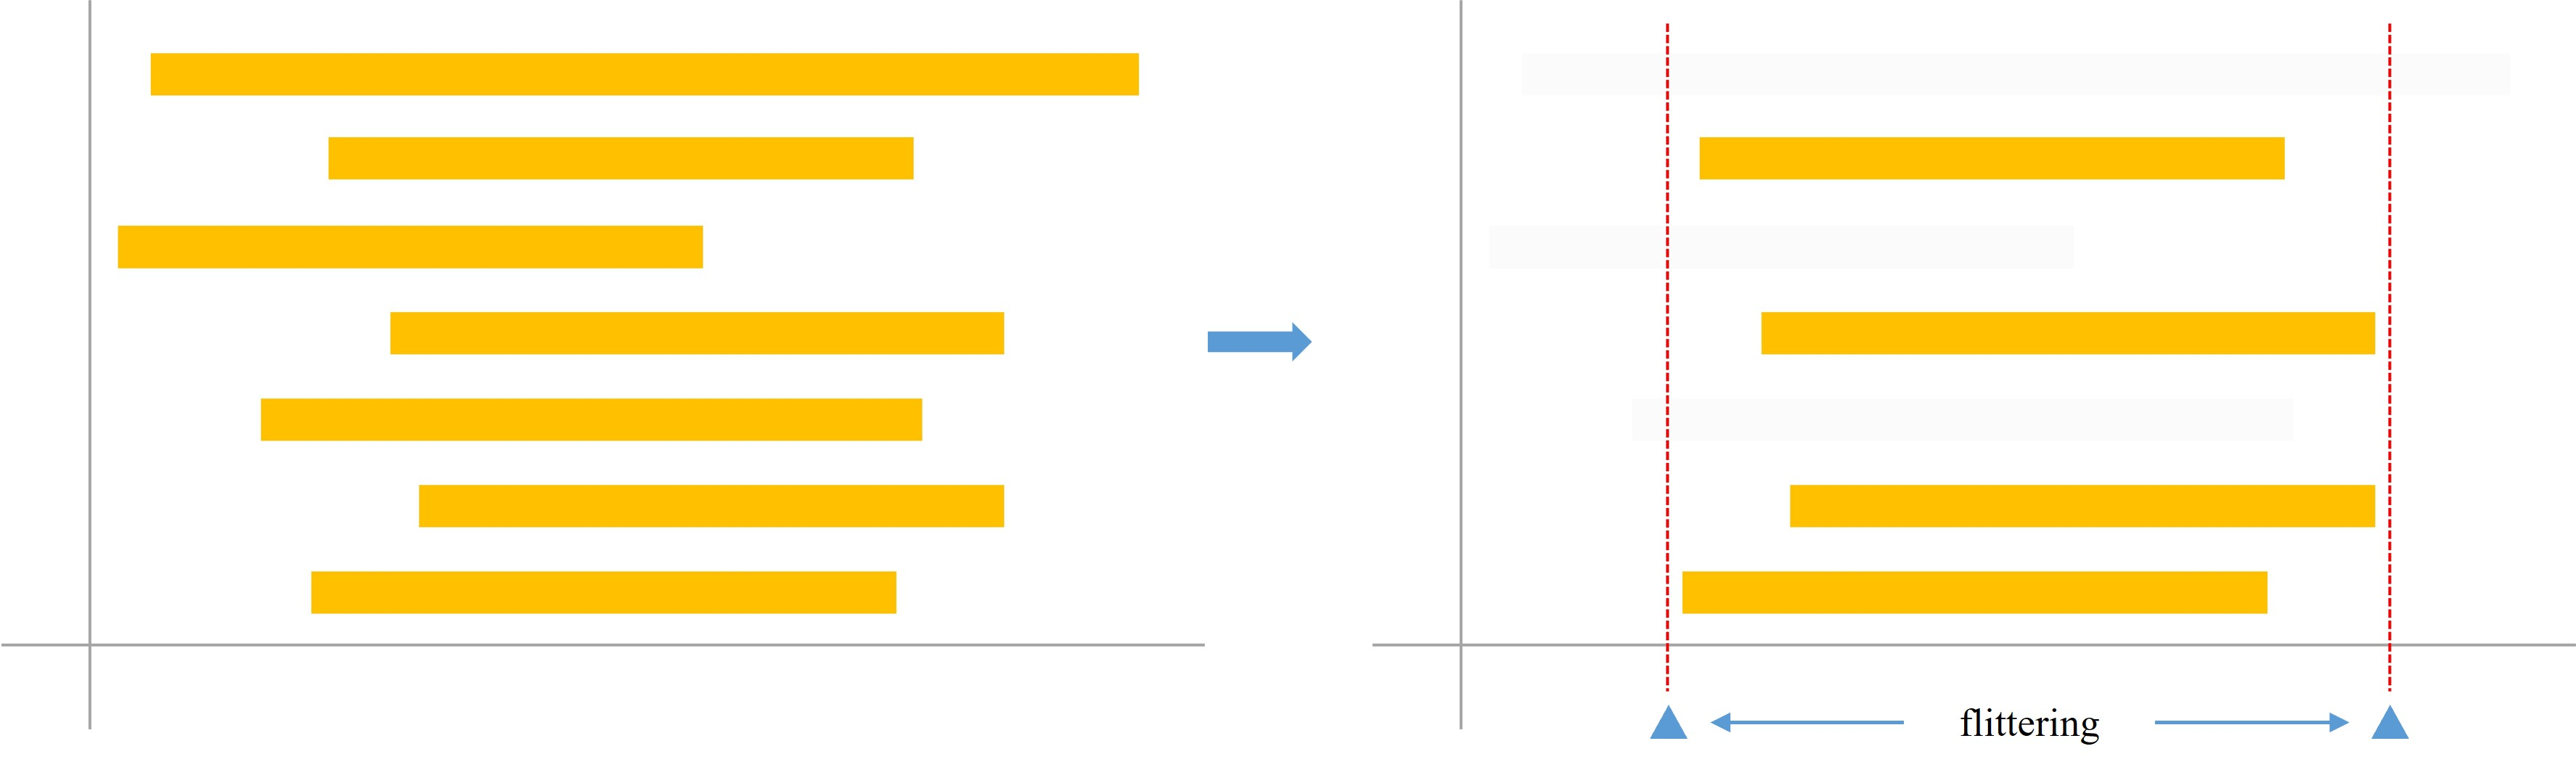

In [ ]:
filtered_log

In [ ]:
# 데이터 프레임으로 변환 후 확인
from pm4py.objects.conversion.log import converter as log_converter
dt = log_converter.apply(filtered_log, variant=log_converter.Variants.TO_DATA_FRAME)
print(dt)